# Lesson 8 - Outliers - Part I

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

In [2]:
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

In [32]:
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

In [4]:
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [5]:
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

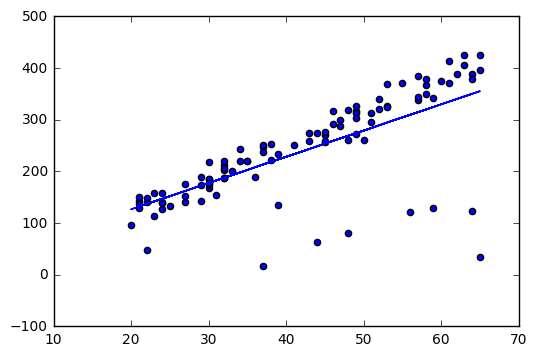

In [6]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [7]:
print reg.coef_[0]

[ 5.07793064]


In [8]:
reg.score(ages_test, net_worths_test)

0.87826247883513986

In [29]:
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

blabla


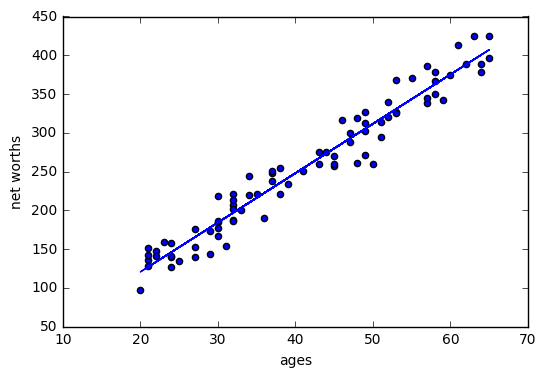

In [24]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages_clean, net_worths_clean, errors = zip(*cleaned_data)
    ages_clean       = numpy.reshape( numpy.array(ages_clean), (len(ages), 1))
    net_worths_clean = numpy.reshape( numpy.array(net_worths_clean), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages_clean, net_worths_clean)
        plt.plot(ages_clean, reg.predict(ages_clean), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [22]:
reg.coef_

array([[ 6.36859481]])

In [23]:
reg.score(ages_test, net_worths_test)

0.98318945568560678